In [72]:
import torch
import numpy as np
from PIL import Image

In [213]:
img = Image.open("..\..\data\images\mitosis_img_001.jpg").convert("L").resize((320, 320))
images = np.empty((0, 32, 32))
for i in range(10):
    for k in range(10):
        images = np.append(images, np.array(img.crop((i * 32, k * 32, i * 32 + 32, k * 32 + 32))).reshape(1, 32, 32), axis = 0)

(100, 32, 32)


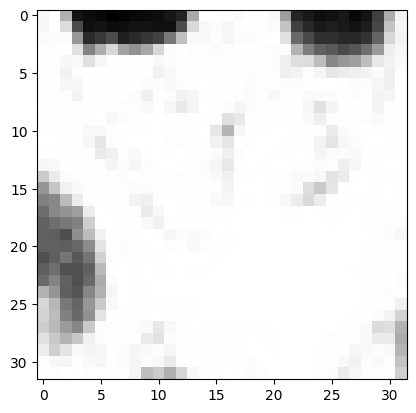

In [220]:
print(images.shape)
plt.imshow(images[0], cmap='gray')